In [1]:
def clean_text(text):
    text = text.lower()
    #newline
    text=text.replace("\n"," ").replace("\r"," ")
    #punc and numbers
    punc_list='!@+-"#$%^&*)(,./:;<>?[\]_{|}~' +'0123456789'
    t=str.maketrans(dict.fromkeys(punc_list," "))
    text=text.translate(t)
    #single quote 
    t=str.maketrans(dict.fromkeys("'`",""))
    text=text.translate(t)
    #extra white space
    text=text.strip()
    text = ' '.join(text.split())
    return text    

In [2]:
#https://towardsdatascience.com/benchmarking-python-nlp-tokenizers-3ac4735100c5
def tokenizer(text):
    words=regexp_tokenize(text,pattern='\s+',gaps=True)
    return words

In [3]:
#https://github.com/barrust/pyspellchecker
def spell_check(text):
    spell = SpellChecker()
    word_list=[]
    for word in text:
        word_list.append(spell.correction(word))
    return word_list

In [4]:
#https://towardsdatascience.com/text-pre-processing-stop-words-removal-using-different-libraries-f20bac19929a
import nltk
from nltk.corpus import stopwords
sw_nltk = stopwords.words('english')
sw_nltk.remove('why')
def remove_stopwords(text):
    words = [word for word in text if word not in sw_nltk]
    return words

In [5]:
#https://www.geeksforgeeks.org/python-lemmatization-approaches-with-examples/
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
def lemma_pos(stopwords_removed):
    def pos_tagger(nltk_tag):
        if nltk_tag.startswith('J'):
            return wordnet.ADJ
        elif nltk_tag.startswith('V'):
            return wordnet.VERB
        elif nltk_tag.startswith('N'):
            return wordnet.NOUN
        elif nltk_tag.startswith('R'):
            return wordnet.ADV
        else:         
            return None

    lemmatizer = WordNetLemmatizer()

    # tokenize the sentence and find the POS tag for each token
    pos_tagged = nltk.pos_tag(stopwords_removed) 
    wordnet_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tagged)) #original pos tagging

    #lemmatization + pos tagging list
    lemma_pos_dict = {}
    wordlist = []
    for word, tag in wordnet_tagged:
        if tag is None:
            # if there is no available tag, append the token as is
            lemma_pos_dict[word]=tag
            wordlist.append(word)
        else:       
            # else use the tag to lemmatize the token
            lemma = lemmatizer.lemmatize(word, tag)
            lemma_pos_dict[lemma]=tag
            wordlist.append(lemma)
    return lemma_pos_dict,wordlist

In [6]:
def term_freq(data_words,data_words_verbs):
    weights={'v':5,'n':3,'a':3,'g':1,'r':1,None:1}
    dict={}
    summation=0
    for word in data_words:
        summation+=weights[data_words_verbs[word]]
    for word in data_words:
        if word not in dict.keys():
             dict[word]=(data_words.count(word) * weights[data_words_verbs[word]])/summation
    return dict    

In [7]:
def idf(tf):
    import math
    idf={}
    for doc in tf:
        for word in doc.keys():
            count=0
            for docno in tf:
                if word in docno.keys() and word not in idf:
                    count+=1
          
            if(word not in idf):
                idf[word]=1+math.log(len(tf)/count,10)
            
    return idf

In [8]:
def tf_idf(l,idf_list):
    l1=[]

    for doc in l:
        tfidf={}
        for word in doc.keys():
            tfidf[word]=idf_list[word]*doc[word];
        l1.append(tfidf)
    return l1

In [9]:
def CSR(tf_idf_dict):    
    import numpy as np
    import pandas as pd
    unique_words=[]
    for sentence in tf_idf_dict:
        for word in sentence.keys():
            if word not in unique_words:
                unique_words.append(word)
    len_tfidf=len(tf_idf_dict)
    len_unique_words=len(unique_words)
    df = pd.DataFrame(np.zeros((len_tfidf, len(unique_words))))
    df.columns = unique_words
    sentno=0
    for sentence in tf_idf_dict:
        for word in sentence.keys():
            df.iloc[sentno][word]=sentence[word]
        sentno=sentno+1    
    from scipy import sparse
    sparse_tfidf=sparse.csr_matrix(df)
    return sparse_tfidf,unique_words

In [10]:
def CSR_input(unique_words,tf_idf_dict):    
    import numpy as np
    import pandas as pd
    len_tfidf=len(tf_idf_dict)
    len_unique_words=len(unique_words)
    df = pd.DataFrame(np.zeros((len_tfidf, len(unique_words))))
    df.columns = unique_words
    sentno=0
    for sentence in tf_idf_dict:
        for word in sentence.keys():
            df.iloc[sentno][word]=sentence[word]
        sentno=sentno+1    
    from scipy import sparse
    sparse_tfidf=sparse.csr_matrix(df)
    #print(unique_words[:10])
    return sparse_tfidf

In [11]:
#0-anaylsing 1-applying 2-creating 3-evaluating 4- remembering 5-understanding
def getLevel(x):
    if(x==0):
        return 'analysing'
    elif(x==1):
        return 'applying'
    elif(x==2):
        return 'creating'
    elif(x==3):
        return 'evaluating'
    elif(x==4):
        return 'remembering'
    elif(x==5):
        return 'understanding'
    else:
        return 'error'

In [12]:
import pandas as pd
dataset = pd.read_csv('fullprojectdata.csv')
dataset.head()

,Text,Target
0,About what proportion of the population of the...,remembering
1,Correctly label the brain lobes indicated on t...,remembering
2,Define compound interest.4.,remembering
3,Define four types of traceability.5.,remembering
4,Define mercantilism.6.,remembering


In [13]:
sentences_list= list(dataset['Text'])


#Preprocessing

In [14]:
from nltk.tokenize import word_tokenize
from nltk.tokenize.regexp import regexp_tokenize
from spellchecker import SpellChecker

In [15]:
pp_sentence_list=[]
position_dict_list=[]
for sentence in sentences_list:
    cleaned = clean_text(sentence)
    tokenized = tokenizer(cleaned)
    spellchecked= spell_check(tokenized)
    #stopwords_removed = remove_stopwords(spellchecked)
    pos_dict,wordlist = lemma_pos(spellchecked)
    pp_sentence_list.append(wordlist)
    position_dict_list.append(pos_dict)

In [16]:
tf=[]
for (sentence, onedict) in zip(pp_sentence_list,position_dict_list):
    output = term_freq(sentence,onedict)
    tf.append(output)
idf_list=idf(tf)
tf_idf_dict=tf_idf(tf,idf_list)

In [17]:
sparse_matrix_dataset,unique_words = CSR(tf_idf_dict)

In [18]:
import pickle
with open('unique_words.pkl', 'wb') as f:
    pickle.dump(unique_words, f)  
   

In [19]:
X= sparse_matrix_dataset

In [20]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y=le.fit_transform(dataset['Target'])

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
#for x in range(1,50):
 # 0-anaylsing 1-applying 2-creating 3-evaluating 4- remembering 5-understanding
target_names = ['analysing', 'applying', 'creating','evaluating','remembering','understanding']
knn = KNeighborsClassifier(n_neighbors=20, weights='distance')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
    #print("x=",x,end=" ")
from sklearn.metrics import classification_report
print("Classification Report of KNN:")
print(classification_report(y_test, y_pred,target_names=target_names))

Classification Report of KNN:
               precision    recall  f1-score   support

    analysing       0.96      0.87      0.91       100
     applying       0.92      0.85      0.89       100
     creating       0.88      0.97      0.92       104
   evaluating       0.88      0.92      0.90        99
  remembering       1.00      0.93      0.96        84
understanding       0.90      0.97      0.93        96

     accuracy                           0.92       583
    macro avg       0.92      0.92      0.92       583
 weighted avg       0.92      0.92      0.92       583



In [25]:
from sklearn.svm import SVC  
svc = SVC(kernel='linear') 
svc.fit(X_train, y_train) 
y_pred = svc.predict(X_test)

#from sklearn import metrics
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
from sklearn.metrics import classification_report
print("Classification Report of SVM:")
print(classification_report(y_test, y_pred, target_names=target_names))

Classification Report of SVM:
               precision    recall  f1-score   support

    analysing       0.93      0.91      0.92       100
     applying       0.92      0.88      0.90       100
     creating       0.90      0.92      0.91       104
   evaluating       0.93      0.93      0.93        99
  remembering       0.92      0.99      0.95        84
understanding       0.99      0.96      0.97        96

     accuracy                           0.93       583
    macro avg       0.93      0.93      0.93       583
 weighted avg       0.93      0.93      0.93       583



In [26]:
from sklearn.model_selection import train_test_split
X_dense= X.toarray()
X_train, X_test, y_train, y_test = train_test_split(X_dense,y, test_size=0.3,random_state=42)
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
 
nb = GaussianNB();
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

#from sklearn import metrics
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
from sklearn.metrics import classification_report
print("Classification Report of Naive Bayes:")
print(classification_report(y_test, y_pred, target_names=target_names))

Classification Report of Naive Bayes:
               precision    recall  f1-score   support

    analysing       0.99      0.84      0.91       100
     applying       0.88      0.89      0.89       100
     creating       0.87      0.90      0.89       104
   evaluating       0.91      0.91      0.91        99
  remembering       0.91      0.96      0.94        84
understanding       0.93      0.98      0.95        96

     accuracy                           0.91       583
    macro avg       0.91      0.91      0.91       583
 weighted avg       0.91      0.91      0.91       583



In [27]:
from sklearn.ensemble import VotingClassifier
import pickle
estimator = []
estimator.append(('KNN', knn))
estimator.append(('SVC', svc))
estimator.append(('NB', nb))

votc = VotingClassifier(estimators = estimator, voting ='hard')
votc.fit(X_train, y_train)
y_pred = votc.predict(X_test)

from sklearn import metrics
from sklearn.metrics import classification_report
print("Classification Report of Ensemble voter:")
print(classification_report(y_test, y_pred, target_names=target_names))


Classification Report of Ensemble voter:
               precision    recall  f1-score   support

    analysing       0.95      0.91      0.93       100
     applying       0.93      0.89      0.91       100
     creating       0.91      0.92      0.92       104
   evaluating       0.90      0.95      0.93        99
  remembering       0.94      0.96      0.95        84
understanding       0.98      0.98      0.98        96

     accuracy                           0.93       583
    macro avg       0.94      0.94      0.94       583
 weighted avg       0.94      0.93      0.93       583



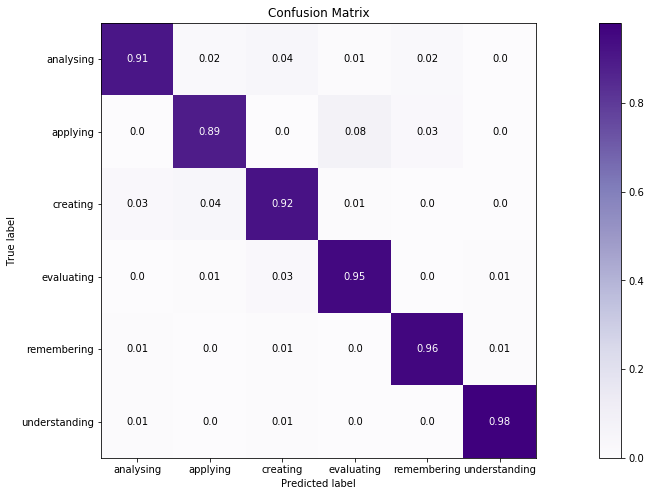

In [34]:
import scikitplot as skplt
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(50,8))
ax1 = fig.add_subplot(121)
y_test_label=[]
y_pred_label=[]
for i in range(len(y_test)):
    y_test_label.append(getLevel(y_test[i]))
    y_pred_label.append(getLevel(y_pred[i]))
skplt.metrics.plot_confusion_matrix(y_test_label, y_pred_label,
                                    normalize=True,
                                    title="Confusion Matrix",
                                    cmap="Purples",
                                    
                                   ax=ax1);

In [ ]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
dataset['Target'].iplot(
    kind='hist',
    bins=50,
    xTitle='Blooms Taxonomy Level',
    linecolor='black',
    yTitle='count',
    title='Blooms Taxonomy Levels Distribution')

In [ ]:
modelfile = '26marchmodel.pkl'
#pickle.dump(votc, open(modelfile, 'wb'))

In [ ]:
import pickle
loaded_model = pickle.load(open(modelfile, 'rb'))

inp = input("\n enter qn")
inplist=[]
inplist.append(inp)
pp_sentence_listi=[]
position_dict_listi=[]
for sentencei in inplist:
    cleanedi = clean_text(sentencei)
    tokenizedi = tokenizer(cleanedi)
    spellcheckedi= spell_check(tokenizedi)
    #stopwords_removed = remove_stopwords(spellchecked)
    pos_dicti,wordlisti = lemma_pos(spellcheckedi)
    print(pos_dicti)
    pp_sentence_listi.append(wordlisti)
    position_dict_listi.append(pos_dicti)
tfi=[]
for (sentencei, onedicti) in zip(pp_sentence_listi,position_dict_listi):
    outputi = term_freq(sentencei,onedicti)
    tfi.append(outputi)
idf_listi=idf(tfi)
tf_idf_dicti=tf_idf(tfi,idf_listi)
print("Keywords in descending order of importance")
print(sorted(tf_idf_dicti[0].items(), key=lambda x: x[1], reverse=True))
with open('unique_words.pkl', 'rb') as f:
    unique_words_input = pickle.load(f)
sparse_matrixi = CSR_input(unique_words_input, tf_idf_dicti)
#print("sparse_matrixi")
#print(sparse_matrixi)
sparse_inpi= sparse_matrixi
predictedi = loaded_model.predict(sparse_inpi.toarray())
print("Predicted level: "+ getLevel(predictedi))

